In [1]:
import nn
import sys
import numpy as np
reload(nn)
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_mldata
from timeit import default_timer as timer 
from sklearn.metrics import classification_report
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
mnist = fetch_mldata('MNIST original')

In [3]:
mnist.data.shape

(70000, 784)

In [4]:
mnist.target.shape

(70000,)

In [5]:
np.unique(mnist.target)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [6]:
X_FULL = mnist.data 
Y_FULL = mnist.target


In [7]:
Y_FULL_MOD = np.zeros((Y_FULL.shape[0], 10))
for i in xrange(Y_FULL.shape[0]):
    Y_FULL_MOD[i][int(Y_FULL[i])] = 1

In [8]:
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(
      X_FULL, Y_FULL_MOD, test_size=0.33)

In [9]:
def print_work_time(func):
    def wrapper(*args, **kwargs):
        start = timer()
        result = func(*args, **kwargs)
        end = timer()
        print("Execution take {}".format(end - start))
        return result
    return wrapper

In [10]:
@print_work_time
def learn_on_model(X, Y, model, X_test = None, Y_test = None, learning_rate = 1e-4, batch_size = 20, max_epoch_num = 50, min_loss = 1e-3):
    loss = 1000
    epoch_num = 0
    loss_arr = np.zeros(max_epoch_num)
    test_loss_arr = np.zeros(max_epoch_num) if not (type(X_test) is None) else None
    
    while loss > min_loss and epoch_num < max_epoch_num:
 
        sys.stdout.write("Epoch {} ... ".format(epoch_num + 1))
        for bn, start in enumerate(xrange(0, X_TRAIN.shape[0], batch_size)):
            X_CUR = X[start:start + batch_size]
            Y_CUR = Y[start:start + batch_size]   
            loss = predictor.forward(X_CUR, Y_CUR)
            predictor.backward(alpha = learning_rate)
            

        loss = predictor.forward(X, Y)
        loss_arr[epoch_num] = loss
        sys.stdout.write("Loss : {0:.2f}\n".format(loss))
        if not (type(X_test) is None):
            loss_s = predictor.forward(X_test, Y_test)
            test_loss_arr[epoch_num] = loss_s
            
            
        epoch_num += 1
        


    return loss_arr, test_loss_arr

In [14]:
def make_classification_report(model, X_TRAIN, Y_TRAIN, X_TEST, Y_TEST):
    print ("Train report")
    y_predicted = model.forward(X_TRAIN)

    indices = np.argmax(y_predicted, 1)
    real_indices = np.argmax( Y_TRAIN, 1)
    print (classification_report(real_indices, indices))
    
    print ("Test report")
    y_predicted = model.forward(X_TEST)
    indices = np.argmax(y_predicted, 1)
    real_indices = np.argmax(Y_TEST, 1)
    print (classification_report(real_indices, indices))

Train report
             precision    recall  f1-score   support

          0       0.98      0.99      0.99      4665
          1       0.99      0.99      0.99      5316
          2       0.97      0.98      0.97      4694
          3       0.98      0.97      0.98      4772
          4       0.97      0.98      0.98      4554
          5       0.98      0.97      0.97      4186
          6       0.98      0.99      0.98      4628
          7       0.98      0.98      0.98      4896
          8       0.97      0.98      0.98      4551
          9       0.98      0.97      0.97      4638

avg / total       0.98      0.98      0.98     46900

Test report
             precision    recall  f1-score   support

          0       0.96      0.98      0.97      2238
          1       0.98      0.98      0.98      2561
          2       0.94      0.94      0.94      2296
          3       0.94      0.93      0.94      2369
          4       0.93      0.96      0.94      2270
          5      

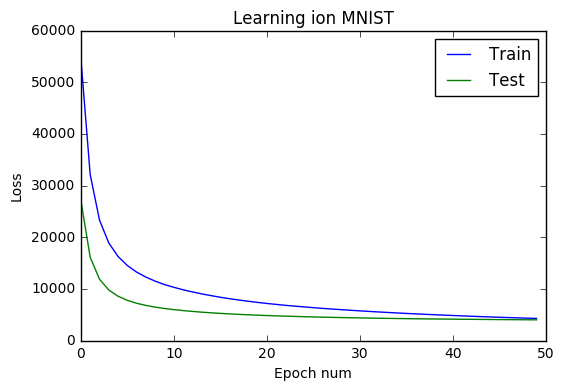

In [15]:
predictor = nn.Sequential()
predictor.add(nn.Linear(784, 250))
predictor.add(nn.Tanh(250))
predictor.add(nn.Linear(250, 10))
predictor.add(nn.CrossEntropy (10))


loss_arr, test_loss_arr = learn_on_model(X_TRAIN, Y_TRAIN, predictor, X_TEST, Y_TEST)
make_classification_report(predictor, X_TRAIN, Y_TRAIN, X_TEST, Y_TEST)


x = np.arange(loss_arr.shape[0])


plt.plot(x, loss_arr, x, test_loss_arr)

plt.legend(["Train", "Test"])
plt.title("Learning ion MNIST")
plt.xlabel("Epoch num")
plt.ylabel("Loss")

Видим, что наша нейросеть смогла достаточно качественно распознавать цифры на изображениях. Кривая обучения достаточно гладкая, качество распознавания высокое. Таким образом hand-made сеть неплохо распознает цифры!) 

P.S Рассматривались и другие конфигурации сети, но особого улучшения на них получено не было. В данном отчете приведена одна из лучших попыток.

Оказалось, что инициальныезначения весов в сети достаточно сильно влияют на способность сети обучаться и необходимо задавать их в районе $10^{-6}$, при больших значениях сеть начинала вести себя непредсказуемо. 
